In [70]:
import sys
import numpy as np
import pandas as pd
import json
import dateutil.parser
import matplotlib.pyplot as plt
import seaborn as sns

# You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%config InlineBackend.figure_format = 'svg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline

# You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%config InlineBackend.figure_format = 'svg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline

from datetime import date, time, datetime
from dateutil.parser import parse

In [2]:
all_files = ("http://web.mta.info/developers/data/nyct/turnstile/turnstile_170304.txt",
             'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170311.txt',
             'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170318.txt',
             'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170325.txt',
             'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170401.txt',
             'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170408.txt',
             'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170415.txt',
             'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170422.txt',
             'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170429.txt',
             'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170506.txt',
             'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170513.txt',
             'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170520.txt',
             'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170527.txt',
             #2018
             'http://web.mta.info/developers/data/nyct/turnstile/turnstile_180303.txt',
             'http://web.mta.info/developers/data/nyct/turnstile/turnstile_180310.txt',
             'http://web.mta.info/developers/data/nyct/turnstile/turnstile_180317.txt',
             'http://web.mta.info/developers/data/nyct/turnstile/turnstile_180324.txt',
             'http://web.mta.info/developers/data/nyct/turnstile/turnstile_180331.txt',
             'http://web.mta.info/developers/data/nyct/turnstile/turnstile_180407.txt',
             'http://web.mta.info/developers/data/nyct/turnstile/turnstile_180414.txt',
             'http://web.mta.info/developers/data/nyct/turnstile/turnstile_180421.txt',
             'http://web.mta.info/developers/data/nyct/turnstile/turnstile_180428.txt',
             'http://web.mta.info/developers/data/nyct/turnstile/turnstile_180505.txt',
             'http://web.mta.info/developers/data/nyct/turnstile/turnstile_180512.txt',
             'http://web.mta.info/developers/data/nyct/turnstile/turnstile_180519.txt',
             'http://web.mta.info/developers/data/nyct/turnstile/turnstile_180526.txt',
             #2019
             'http://web.mta.info/developers/data/nyct/turnstile/turnstile_190302.txt',
             'http://web.mta.info/developers/data/nyct/turnstile/turnstile_190309.txt',
             'http://web.mta.info/developers/data/nyct/turnstile/turnstile_190316.txt',
             'http://web.mta.info/developers/data/nyct/turnstile/turnstile_190323.txt',
             'http://web.mta.info/developers/data/nyct/turnstile/turnstile_190330.txt',
             'http://web.mta.info/developers/data/nyct/turnstile/turnstile_190406.txt',
             'http://web.mta.info/developers/data/nyct/turnstile/turnstile_190413.txt',
             'http://web.mta.info/developers/data/nyct/turnstile/turnstile_190420.txt',
             'http://web.mta.info/developers/data/nyct/turnstile/turnstile_190427.txt',
             'http://web.mta.info/developers/data/nyct/turnstile/turnstile_190504.txt',
             'http://web.mta.info/developers/data/nyct/turnstile/turnstile_190511.txt',
             'http://web.mta.info/developers/data/nyct/turnstile/turnstile_190518.txt',
             'http://web.mta.info/developers/data/nyct/turnstile/turnstile_190525.txt')
             
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

orig_df = pd.concat(li, axis=0, ignore_index=True)

In [3]:
orig_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/25/2017,03:00:00,REGULAR,6064627,2055986
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/25/2017,07:00:00,REGULAR,6064645,2055999
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/25/2017,11:00:00,REGULAR,6064712,2056102
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/25/2017,15:00:00,REGULAR,6064903,2056172
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/25/2017,19:00:00,REGULAR,6065267,2056245


In [4]:
orig_df.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
7779975,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/24/2019,05:00:00,REGULAR,5554,378
7779976,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/24/2019,09:00:00,REGULAR,5554,378
7779977,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/24/2019,13:00:00,REGULAR,5554,378
7779978,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/24/2019,17:00:00,REGULAR,5554,378
7779979,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/24/2019,21:00:00,REGULAR,5554,378


In [5]:
orig_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7779980 entries, 0 to 7779979
Data columns (total 11 columns):
C/A                                                                     object
UNIT                                                                    object
SCP                                                                     object
STATION                                                                 object
LINENAME                                                                object
DIVISION                                                                object
DATE                                                                    object
TIME                                                                    object
DESC                                                                    object
ENTRIES                                                                 int64
EXITS                                                                   int64
dtypes: int64(2), ob

In [6]:
big_df = orig_df.copy()
big_df = big_df.rename(columns=lambda x: x.strip())
list(big_df.columns.values)

['C/A',
 'UNIT',
 'SCP',
 'STATION',
 'LINENAME',
 'DIVISION',
 'DATE',
 'TIME',
 'DESC',
 'ENTRIES',
 'EXITS']

In [7]:
big_df['year'] = pd.DatetimeIndex(big_df['DATE']).year
big_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,year
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/25/2017,03:00:00,REGULAR,6064627,2055986,2017
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/25/2017,07:00:00,REGULAR,6064645,2055999,2017
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/25/2017,11:00:00,REGULAR,6064712,2056102,2017
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/25/2017,15:00:00,REGULAR,6064903,2056172,2017
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/25/2017,19:00:00,REGULAR,6065267,2056245,2017


In [8]:
big_df['ID1_turnstile']=big_df['STATION']+'_'+big_df['C/A']+'_'+big_df['UNIT']+'_'+big_df['SCP']+'_'+big_df['year'].map(str)
big_df['ID2_booth']=big_df['STATION']+'_'+big_df['C/A'].map(str)
big_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,year,ID1_turnstile,ID2_booth
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/25/2017,03:00:00,REGULAR,6064627,2055986,2017,59 ST_A002_R051_02-00-00_2017,59 ST_A002
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/25/2017,07:00:00,REGULAR,6064645,2055999,2017,59 ST_A002_R051_02-00-00_2017,59 ST_A002
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/25/2017,11:00:00,REGULAR,6064712,2056102,2017,59 ST_A002_R051_02-00-00_2017,59 ST_A002
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/25/2017,15:00:00,REGULAR,6064903,2056172,2017,59 ST_A002_R051_02-00-00_2017,59 ST_A002
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/25/2017,19:00:00,REGULAR,6065267,2056245,2017,59 ST_A002_R051_02-00-00_2017,59 ST_A002


In [9]:
big_df['datetime'] = big_df['DATE'] + ' ' + big_df['TIME']
big_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,year,ID1_turnstile,ID2_booth,datetime
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/25/2017,03:00:00,REGULAR,6064627,2055986,2017,59 ST_A002_R051_02-00-00_2017,59 ST_A002,02/25/2017 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/25/2017,07:00:00,REGULAR,6064645,2055999,2017,59 ST_A002_R051_02-00-00_2017,59 ST_A002,02/25/2017 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/25/2017,11:00:00,REGULAR,6064712,2056102,2017,59 ST_A002_R051_02-00-00_2017,59 ST_A002,02/25/2017 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/25/2017,15:00:00,REGULAR,6064903,2056172,2017,59 ST_A002_R051_02-00-00_2017,59 ST_A002,02/25/2017 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/25/2017,19:00:00,REGULAR,6065267,2056245,2017,59 ST_A002_R051_02-00-00_2017,59 ST_A002,02/25/2017 19:00:00


In [10]:
big_df['day_of_week'] = big_df['DATE'].apply(lambda val: parse(val).strftime('%A'))
big_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,year,ID1_turnstile,ID2_booth,datetime,day_of_week
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/25/2017,03:00:00,REGULAR,6064627,2055986,2017,59 ST_A002_R051_02-00-00_2017,59 ST_A002,02/25/2017 03:00:00,Saturday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/25/2017,07:00:00,REGULAR,6064645,2055999,2017,59 ST_A002_R051_02-00-00_2017,59 ST_A002,02/25/2017 07:00:00,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/25/2017,11:00:00,REGULAR,6064712,2056102,2017,59 ST_A002_R051_02-00-00_2017,59 ST_A002,02/25/2017 11:00:00,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/25/2017,15:00:00,REGULAR,6064903,2056172,2017,59 ST_A002_R051_02-00-00_2017,59 ST_A002,02/25/2017 15:00:00,Saturday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/25/2017,19:00:00,REGULAR,6065267,2056245,2017,59 ST_A002_R051_02-00-00_2017,59 ST_A002,02/25/2017 19:00:00,Saturday


In [11]:
big_df.sort_values(by=['ID1_turnstile','datetime'], inplace=True)
big_df.reset_index(inplace=True, drop=True)
big_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,year,ID1_turnstile,ID2_booth,datetime,day_of_week
0,H007,R248,00-00-00,1 AV,L,BMT,02/25/2017,03:00:00,REGULAR,12072837,13273276,2017,1 AV_H007_R248_00-00-00_2017,1 AV_H007,02/25/2017 03:00:00,Saturday
1,H007,R248,00-00-00,1 AV,L,BMT,02/25/2017,07:00:00,REGULAR,12072887,13273482,2017,1 AV_H007_R248_00-00-00_2017,1 AV_H007,02/25/2017 07:00:00,Saturday
2,H007,R248,00-00-00,1 AV,L,BMT,02/25/2017,11:00:00,REGULAR,12073243,13274183,2017,1 AV_H007_R248_00-00-00_2017,1 AV_H007,02/25/2017 11:00:00,Saturday
3,H007,R248,00-00-00,1 AV,L,BMT,02/25/2017,15:00:00,REGULAR,12073878,13275131,2017,1 AV_H007_R248_00-00-00_2017,1 AV_H007,02/25/2017 15:00:00,Saturday
4,H007,R248,00-00-00,1 AV,L,BMT,02/25/2017,19:00:00,REGULAR,12074583,13276381,2017,1 AV_H007_R248_00-00-00_2017,1 AV_H007,02/25/2017 19:00:00,Saturday


In [12]:
big_df['entries_count'] = big_df.groupby(['ID1_turnstile'])['ENTRIES'].diff().tolist()
big_df['exits_count'] = big_df.groupby(['ID1_turnstile'])['EXITS'].diff().tolist()
big_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,year,ID1_turnstile,ID2_booth,datetime,day_of_week,entries_count,exits_count
0,H007,R248,00-00-00,1 AV,L,BMT,02/25/2017,03:00:00,REGULAR,12072837,13273276,2017,1 AV_H007_R248_00-00-00_2017,1 AV_H007,02/25/2017 03:00:00,Saturday,NaN,NaN
1,H007,R248,00-00-00,1 AV,L,BMT,02/25/2017,07:00:00,REGULAR,12072887,13273482,2017,1 AV_H007_R248_00-00-00_2017,1 AV_H007,02/25/2017 07:00:00,Saturday,50.0,206.0
2,H007,R248,00-00-00,1 AV,L,BMT,02/25/2017,11:00:00,REGULAR,12073243,13274183,2017,1 AV_H007_R248_00-00-00_2017,1 AV_H007,02/25/2017 11:00:00,Saturday,356.0,701.0
3,H007,R248,00-00-00,1 AV,L,BMT,02/25/2017,15:00:00,REGULAR,12073878,13275131,2017,1 AV_H007_R248_00-00-00_2017,1 AV_H007,02/25/2017 15:00:00,Saturday,635.0,948.0
4,H007,R248,00-00-00,1 AV,L,BMT,02/25/2017,19:00:00,REGULAR,12074583,13276381,2017,1 AV_H007_R248_00-00-00_2017,1 AV_H007,02/25/2017 19:00:00,Saturday,705.0,1250.0


In [13]:
big_df['total_ridership'] = big_df['entries_count'] + big_df['exits_count']
big_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,year,ID1_turnstile,ID2_booth,datetime,day_of_week,entries_count,exits_count,total_ridership
0,H007,R248,00-00-00,1 AV,L,BMT,02/25/2017,03:00:00,REGULAR,12072837,13273276,2017,1 AV_H007_R248_00-00-00_2017,1 AV_H007,02/25/2017 03:00:00,Saturday,NaN,NaN,NaN
1,H007,R248,00-00-00,1 AV,L,BMT,02/25/2017,07:00:00,REGULAR,12072887,13273482,2017,1 AV_H007_R248_00-00-00_2017,1 AV_H007,02/25/2017 07:00:00,Saturday,50.0,206.0,256.0
2,H007,R248,00-00-00,1 AV,L,BMT,02/25/2017,11:00:00,REGULAR,12073243,13274183,2017,1 AV_H007_R248_00-00-00_2017,1 AV_H007,02/25/2017 11:00:00,Saturday,356.0,701.0,1057.0
3,H007,R248,00-00-00,1 AV,L,BMT,02/25/2017,15:00:00,REGULAR,12073878,13275131,2017,1 AV_H007_R248_00-00-00_2017,1 AV_H007,02/25/2017 15:00:00,Saturday,635.0,948.0,1583.0
4,H007,R248,00-00-00,1 AV,L,BMT,02/25/2017,19:00:00,REGULAR,12074583,13276381,2017,1 AV_H007_R248_00-00-00_2017,1 AV_H007,02/25/2017 19:00:00,Saturday,705.0,1250.0,1955.0


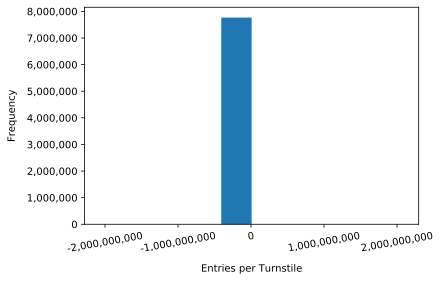

In [64]:
ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.ylabel("Frequency", labelpad = 10)
plt.xlabel("Entries per Turnstile", labelpad = 10)
plt.xticks(rotation=10)
plt.hist(big_df['entries_count'],bins=10);
plt.savefig("entries_before_hist.svg",bbox_inches='tight')

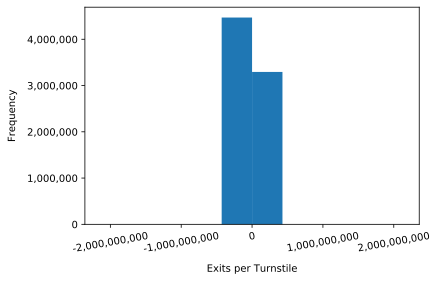

In [65]:
ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.ylabel("Frequency", labelpad = 10)
plt.xlabel("Exits per Turnstile", labelpad = 10)
plt.xticks(rotation=10)
plt.hist(big_df['exits_count'],bins=10);
plt.savefig("exits_before_hist.svg",bbox_inches='tight')

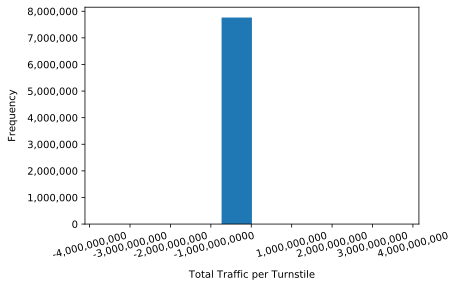

In [66]:
ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.ylabel("Frequency", labelpad = 10)
plt.xlabel("Total Traffic per Turnstile", labelpad = 10)
plt.xticks(rotation=15)
plt.hist(big_df['total_ridership'],bins=10);
plt.savefig("total_ridership_before_hist.svg",bbox_inches='tight')

In [17]:
def get_negative_to_nan(dataframe, col_name):
    
    series = dataframe[col_name].apply(lambda val: np.nan if val < 0 else val)
    
    # sanity check: there should be no negative values,
    # so total False values should be the same as the number of rows of the dataframe.
    assert (series < 0).value_counts()[False] == dataframe.shape[0]
    
    dataframe_clean = dataframe.copy()
    dataframe_clean[col_name] = series
    
    return dataframe_clean

def get_outliers_to_nan(dataframe, col_name):
    
    Q1 = dataframe[col_name].quantile(0.25)
    Q3 = dataframe[col_name].quantile(0.75)
    IQR = Q3 - Q1
    
    series = dataframe[col_name].apply(lambda val: val if (val >= (Q1 - (1.5 * IQR))) & (val <= (Q3 + (1.5 * IQR))) else np.nan)
    
    dataframe_clean = dataframe.copy()
    dataframe_clean[col_name] = series
    
    return dataframe_clean

In [18]:
cleaned_df = get_negative_to_nan(big_df,'entries_count')
cleaned_df = get_negative_to_nan(cleaned_df,'exits_count')
cleaned_df = get_outliers_to_nan(cleaned_df,'entries_count')
cleaned_df = get_outliers_to_nan(cleaned_df,'exits_count')

In [19]:
cleaned_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,year,ID1_turnstile,ID2_booth,datetime,day_of_week,entries_count,exits_count,total_ridership
0,H007,R248,00-00-00,1 AV,L,BMT,02/25/2017,03:00:00,REGULAR,12072837,13273276,2017,1 AV_H007_R248_00-00-00_2017,1 AV_H007,02/25/2017 03:00:00,Saturday,NaN,NaN,NaN
1,H007,R248,00-00-00,1 AV,L,BMT,02/25/2017,07:00:00,REGULAR,12072887,13273482,2017,1 AV_H007_R248_00-00-00_2017,1 AV_H007,02/25/2017 07:00:00,Saturday,50.0,206.0,256.0
2,H007,R248,00-00-00,1 AV,L,BMT,02/25/2017,11:00:00,REGULAR,12073243,13274183,2017,1 AV_H007_R248_00-00-00_2017,1 AV_H007,02/25/2017 11:00:00,Saturday,356.0,NaN,1057.0
3,H007,R248,00-00-00,1 AV,L,BMT,02/25/2017,15:00:00,REGULAR,12073878,13275131,2017,1 AV_H007_R248_00-00-00_2017,1 AV_H007,02/25/2017 15:00:00,Saturday,NaN,NaN,1583.0
4,H007,R248,00-00-00,1 AV,L,BMT,02/25/2017,19:00:00,REGULAR,12074583,13276381,2017,1 AV_H007_R248_00-00-00_2017,1 AV_H007,02/25/2017 19:00:00,Saturday,NaN,NaN,1955.0


In [20]:
cleaned_df.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,year,ID1_turnstile,ID2_booth,datetime,day_of_week,entries_count,exits_count,total_ridership
7779975,R419,R326,00-05-01,ZEREGA AV,6,IRT,05/24/2019,05:00:00,REGULAR,39,148,2019,ZEREGA AV_R419_R326_00-05-01_2019,ZEREGA AV_R419,05/24/2019 05:00:00,Friday,0.0,0.0,0.0
7779976,R419,R326,00-05-01,ZEREGA AV,6,IRT,05/24/2019,09:00:00,REGULAR,39,148,2019,ZEREGA AV_R419_R326_00-05-01_2019,ZEREGA AV_R419,05/24/2019 09:00:00,Friday,0.0,0.0,0.0
7779977,R419,R326,00-05-01,ZEREGA AV,6,IRT,05/24/2019,13:00:00,REGULAR,39,148,2019,ZEREGA AV_R419_R326_00-05-01_2019,ZEREGA AV_R419,05/24/2019 13:00:00,Friday,0.0,0.0,0.0
7779978,R419,R326,00-05-01,ZEREGA AV,6,IRT,05/24/2019,17:00:00,REGULAR,39,148,2019,ZEREGA AV_R419_R326_00-05-01_2019,ZEREGA AV_R419,05/24/2019 17:00:00,Friday,0.0,0.0,0.0
7779979,R419,R326,00-05-01,ZEREGA AV,6,IRT,05/24/2019,21:00:00,REGULAR,39,148,2019,ZEREGA AV_R419_R326_00-05-01_2019,ZEREGA AV_R419,05/24/2019 21:00:00,Friday,0.0,0.0,0.0


In [21]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7779980 entries, 0 to 7779979
Data columns (total 19 columns):
C/A                object
UNIT               object
SCP                object
STATION            object
LINENAME           object
DIVISION           object
DATE               object
TIME               object
DESC               object
ENTRIES            int64
EXITS              int64
year               int64
ID1_turnstile      object
ID2_booth          object
datetime           object
day_of_week        object
entries_count      float64
exits_count        float64
total_ridership    float64
dtypes: float64(3), int64(3), object(13)
memory usage: 1.1+ GB


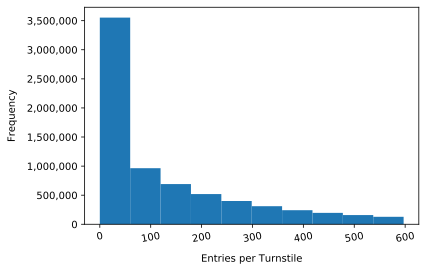

In [67]:
ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.ylabel("Frequency", labelpad = 10)
plt.xlabel("Entries per Turnstile", labelpad = 10)
plt.xticks(rotation=10)
plt.hist(cleaned_df['entries_count'],bins=10);
plt.savefig("entries_after_hist.svg",bbox_inches='tight')

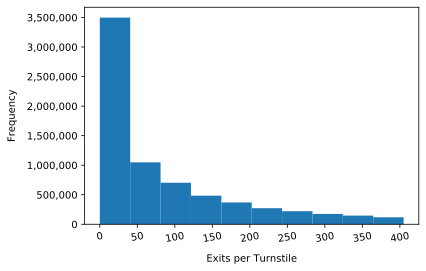

In [68]:
ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.ylabel("Frequency", labelpad = 10)
plt.xlabel("Exits per Turnstile", labelpad = 10)
plt.xticks(rotation=10)
plt.hist(cleaned_df['exits_count'],bins=10);
plt.savefig("exits_after_hist.svg",bbox_inches='tight')

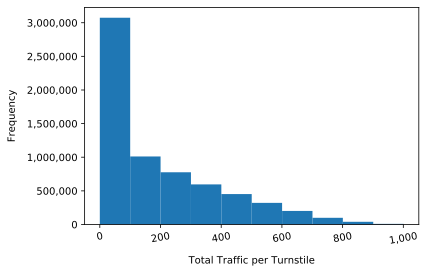

In [69]:
cleaned_df['total_ridership'] = cleaned_df['entries_count'] + cleaned_df['exits_count']
ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.ylabel("Frequency", labelpad = 10)
plt.xlabel("Total Traffic per Turnstile", labelpad = 10)
plt.xticks(rotation=10)
plt.hist(cleaned_df['total_ridership'],bins=10);
plt.savefig("total_ridership_after_hist.svg",bbox_inches='tight')

In [25]:
days_of_week = cleaned_df.day_of_week.unique()
days_of_week

array(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday'], dtype=object)

In [26]:
def create_day_of_week_df(df, col_name, day):
    return df[df[col_name] == day]

In [27]:
df_monday = create_day_of_week_df(cleaned_df,'day_of_week', 'Monday')
df_tuesday = create_day_of_week_df(cleaned_df,'day_of_week', 'Tuesday')
df_wednesday = create_day_of_week_df(cleaned_df,'day_of_week', 'Wednesday')
df_thursday = create_day_of_week_df(cleaned_df,'day_of_week', 'Thursday')
df_friday = create_day_of_week_df(cleaned_df,'day_of_week', 'Friday')
df_saturday = create_day_of_week_df(cleaned_df,'day_of_week', 'Saturday')
df_sunday = create_day_of_week_df(cleaned_df,'day_of_week', 'Sunday')

In [28]:
df_monday.head()
# print(df_tuesday.head())
# print(df_wednesday.head())
# print(df_thursday.head())
# print(df_friday.head())
# print(df_satday.head())
# print(df_sunday.head())

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,year,ID1_turnstile,ID2_booth,datetime,day_of_week,entries_count,exits_count,total_ridership
12,H007,R248,00-00-00,1 AV,L,BMT,02/27/2017,03:00:00,REGULAR,12077246,13281131,2017,1 AV_H007_R248_00-00-00_2017,1 AV_H007,02/27/2017 03:00:00,Monday,83.0,159.0,242.0
13,H007,R248,00-00-00,1 AV,L,BMT,02/27/2017,07:00:00,REGULAR,12077362,13281503,2017,1 AV_H007_R248_00-00-00_2017,1 AV_H007,02/27/2017 07:00:00,Monday,116.0,372.0,488.0
14,H007,R248,00-00-00,1 AV,L,BMT,02/27/2017,11:00:00,REGULAR,12078623,13283001,2017,1 AV_H007_R248_00-00-00_2017,1 AV_H007,02/27/2017 11:00:00,Monday,NaN,NaN,NaN
15,H007,R248,00-00-00,1 AV,L,BMT,02/27/2017,15:00:00,REGULAR,12079102,13283802,2017,1 AV_H007_R248_00-00-00_2017,1 AV_H007,02/27/2017 15:00:00,Monday,479.0,NaN,NaN
16,H007,R248,00-00-00,1 AV,L,BMT,02/27/2017,19:00:00,REGULAR,12080404,13284671,2017,1 AV_H007_R248_00-00-00_2017,1 AV_H007,02/27/2017 19:00:00,Monday,NaN,NaN,NaN


In [29]:
print(big_df.shape)
print(cleaned_df.shape)
print(df_monday.shape)
print(df_tuesday.shape)
print(df_wednesday.shape)
print(df_thursday.shape)
print(df_friday.shape)
print(df_saturday.shape)
print(df_sunday.shape)
print(df_monday.shape[0]+df_tuesday.shape[0]+df_wednesday.shape[0]+df_thursday.shape[0]+df_friday.shape[0]+df_saturday.shape[0]+df_sunday.shape[0])

(7779980, 19)
(7779980, 19)
(1115142, 19)
(1115569, 19)
(1117231, 19)
(1112418, 19)
(1113280, 19)
(1107225, 19)
(1099115, 19)
7779980


In [30]:
def total_ridership_per_booth_per_day(df):
    return df.groupby(['ID2_booth','DATE'])[['entries_count','exits_count','total_ridership']].sum().reset_index()

def average_ridership_per_booth_per_day(df):
    return df.groupby(['ID2_booth'])[['entries_count','exits_count','total_ridership']].mean().reset_index()

def top_n_booths_per_day(df,n):
    df_station = total_ridership_per_booth_per_day(df)
    df_station_avg = average_ridership_per_booth_per_day(df_station)
    return df_station_avg.sort_values(by=['total_ridership'],ascending=False).head(n)

def top_booths(df,day):
    df_copy = df.copy()
    df_copy.reset_index(inplace=True, drop=True)
    df_copy.drop(['entries_count', 'exits_count'], axis=1, inplace=True)
    df_copy.rename(columns={'ID2_booth': 'booth_'+ str(day), 'total_ridership': 'total_ridership_'+ str(day)},inplace=True)
    return df_copy

def all_booths(df,day):
    df_copy = df.copy()
    df_copy.drop(['entries_count', 'exits_count'], axis=1, inplace=True)
    df_copy.rename(columns={'ID2_booth': 'booth', 'total_ridership': 'total_ridership_'+ str(day)},inplace=True)
    return df_copy

In [31]:
df_avg_monday = all_booths(average_ridership_per_booth_per_day(total_ridership_per_booth_per_day(df_monday)),'Monday')
df_avg_tuesday = all_booths(average_ridership_per_booth_per_day(total_ridership_per_booth_per_day(df_tuesday)),'Tuesday')
df_avg_wednesday = all_booths(average_ridership_per_booth_per_day(total_ridership_per_booth_per_day(df_wednesday)),'Wednesday')
df_avg_thursday = all_booths(average_ridership_per_booth_per_day(total_ridership_per_booth_per_day(df_thursday)),'Thursday')
df_avg_friday = all_booths(average_ridership_per_booth_per_day(total_ridership_per_booth_per_day(df_friday)),'Friday')
df_avg_saturday = all_booths(average_ridership_per_booth_per_day(total_ridership_per_booth_per_day(df_saturday)),'Saturday')
df_avg_sunday = all_booths(average_ridership_per_booth_per_day(total_ridership_per_booth_per_day(df_sunday)),'Sunday')

In [32]:
print(df_avg_monday.shape)
print(df_avg_tuesday.shape)
print(df_avg_wednesday.shape)
print(df_avg_thursday.shape)
print(df_avg_friday.shape)
print(df_avg_saturday.shape)
print(df_avg_sunday.shape)

(750, 2)
(750, 2)
(750, 2)
(751, 2)
(750, 2)
(750, 2)
(750, 2)


In [33]:
df_for_visual = pd.merge(df_avg_monday, df_avg_tuesday, how='outer',on='booth')
df_for_visual = pd.merge(df_for_visual, df_avg_wednesday, how='outer',on='booth')
df_for_visual = pd.merge(df_for_visual, df_avg_thursday, how='outer',on='booth')
df_for_visual = pd.merge(df_for_visual, df_avg_friday, how='outer',on='booth')
df_for_visual = pd.merge(df_for_visual, df_avg_saturday, how='outer',on='booth')
df_for_visual = pd.merge(df_for_visual, df_avg_sunday, how='outer',on='booth')
df_for_visual

,booth,total_ridership_Monday,total_ridership_Tuesday,total_ridership_Wednesday,total_ridership_Thursday,total_ridership_Friday,total_ridership_Saturday,total_ridership_Sunday
0,1 AV_H007,5166.230769,5554.179487,5278.256410,5498.051282,5464.846154,4457.230769,4238.282051
1,1 AV_H008,4009.717949,3531.307692,3239.230769,3130.948718,3237.358974,3737.025641,4804.282051
2,103 ST-CORONA_R529,11737.820513,11521.948718,12329.564103,12482.923077,12835.897436,16815.512821,16355.076923
3,103 ST_N037,5140.564103,4998.333333,5139.153846,5183.153846,5543.487179,4596.461538,4031.717949
4,103 ST_R170,11563.589744,11607.897436,11171.205128,11298.615385,11415.564103,11170.692308,10690.589744
...,...,...,...,...,...,...,...,...
746,WTC-CORTLANDT_R108A,2298.923077,2365.538462,2398.538462,2448.000000,2629.461538,983.230769,719.846154
747,WTC-CORTLANDT_R109,2228.307692,2335.153846,2260.153846,2367.384615,2158.000000,703.846154,485.615385
748,YORK ST_N530,2551.871795,2546.333333,2697.538462,2729.435897,2826.897436,3494.076923,3407.615385
749,ZEREGA AV_R419,4775.743590,4515.435897,4641.717949,4689.256410,4940.589744,2647.333333,2080.410256


In [ ]:
# df_for_visual.to_csv(r'df_for_visual.csv')

In [78]:
final_df = pd.read_csv('df_for_visual.csv')

In [79]:
def zero_pad(top_dict, station, count):
    
    if station not in top_dict:
        top_dict[station] = []
        
    weekly_ridership = top_dict[station]
    
    while len(weekly_ridership) < count:
        weekly_ridership.append(0)
        count+1

    return top_dict

In [80]:
from collections import defaultdict


def get_hist_data_alt(dataframe, top_limit, uid = 'station', start_index = 1):
    
    """
    
    """
    
    top_dict = defaultdict(list)
    
    df = dataframe
    
    all_stations = []
    
    # get all stations first
    for count, day in enumerate(df.columns[start_index:]):
        df = df.sort_values(by=[day], ascending=False)
        
        top_df = df.iloc[:top_limit]
        
        all_stations = list(set(all_stations + top_df[uid].tolist()))
        
#     print('final list', all_stationsdd)
            
    for count, day in enumerate(df.columns[start_index:]):
        df = df.sort_values(by=[day], ascending=False)
        
        top_df = df.iloc[:top_limit]
        
        top_stations = top_df[uid].tolist()
        
        for station in top_stations:
            
            
            riders = top_df.loc[top_df[uid] == station][day].values[0]            
            top_dict[station].append(int(riders//1))
        
        # append 0's to the stations that did not make it into the top 3, this is so
        # that it won't show up in the bar chart later
        for station in all_stations:
            if station not in top_stations:
                zero_pad(top_dict, station, count+1)    
    
    return top_dict

In [81]:
start_index = 2
limit_stations_per_day = 3
unique_identifier = 'booth'
final_dict = get_hist_data_alt(final_df, limit_stations_per_day, unique_identifier, start_index)

In [82]:
final_dict

defaultdict(list,
            {'PATH NEW WTC_PTH22': [33366,
              35172,
              36818,
              35508,
              38707,
              25438,
              0],
             'ATL AV-BARCLAY_R610': [19723, 19548, 19903, 20033, 0, 0, 0],
             'SUTPHIN-ARCHER_N605': [19270, 19442, 0, 0, 0, 23623, 0],
             'FLUSHING-MAIN_R533': [0, 0, 20029, 0, 0, 25870, 29685],
             'GROVE STREET_PTH04': [0, 0, 0, 0, 23126, 0, 0],
             'SOUTH FERRY_R101': [0, 0, 0, 20199, 0, 0, 0],
             '34 ST-PENN STA_R138': [0, 0, 0, 0, 0, 0, 21657],
             'EXCHANGE PLACE_PTH05': [0, 0, 0, 0, 20870, 0, 0],
             'JKSN HT-ROOSVLT_N324': [0, 0, 0, 0, 0, 0, 21986]})

In [83]:
def title_case_station(string):
    """
      # converts the ID into human readable format
      title_case_station('23RD STREET_RH12') -> "23rd Street (RH12)"
    """
    split = string.split('_')
    name = split[0]
    booth = split[1]
    
    return "{} ({})".format(name.title(), booth)

def plot_bar_stacked(top_dict, multicolor=True, legend=True):
    """
    x_labels = ('Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun')
    ticks_x = np.linspace(0, 14, X_TICKS) + np.array([(max_stations_per_day * width) / 2] * X_TICKS)
    ax.set_xticks(ticks_x)
    ax.set_xticklabels(x_labels)
    
    ax.set_ylabel('Average Total Traffic', fontsize=14)
    ax.set_title('Top 3 Stations by Day of the Week', fontsize=18)
    
    # add commas to y-axis values, from https://preinventedwheel.com/matplotlib-thousands-separator-1-step-guide/
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    
    formatted_station_names = [title_case_station(name) for name in station_names]

    ax.legend(
        [plot[0] for plot in plots],
        formatted_station_names,
        loc='upper center',
        bbox_to_anchor=(0.5, -0.1),
        ncol=2
    )    
    """
    
    X_TICKS = 7
    ind = np.arange(X_TICKS) # number of days
    width = 0.35 # arbitrary
    
    plots = []
    station_names = []
    count = 0
    previous_bottoms = [np.array([0] * X_TICKS)]
    
    fig, ax = plt.subplots()
    
    low_c = 'lightsteelblue'
    high_c = 'tab:orange'
    colors = [low_c, low_c, high_c, high_c, high_c, low_c, low_c]
    
    for station_name, ridership_weekly in top_dict.items():
        bottom_summed = list(sum(previous_bottoms))
    
        if multicolor:
            plot = ax.bar(ind, ridership_weekly, width, bottom=bottom_summed)
        else:
            plot = ax.bar(ind, ridership_weekly, width, bottom=bottom_summed, color=colors)
            
        
        plots.append(plot)
        station_names.append(station_name)
        previous_bottoms.append(np.array(ridership_weekly))
        count += 1
    
    x_labels = ('Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun')

    ax.set_ylabel('Average Total Traffic', fontsize=14)
#     ax.set_title('Average Total Traffic', fontsize=18) #Top 3 Stations by Day of the Week
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

    
    plt.xticks(ind, x_labels)
#     plt.yticks(np.arange(0, 81, 10))

    if legend:
        plt.legend(
            [plot[0] for plot in plots],
            station_names,
            loc='upper center',
            bbox_to_anchor=(0.5, -0.1),
            ncol=2
        )
    
    return fig

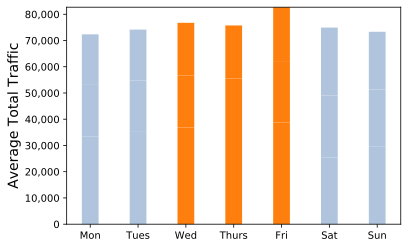

In [84]:
# fig = plot_bar_stacked(final_dict)
fig = plot_bar_stacked(final_dict, multicolor=False, legend=False)

In [85]:
fig.savefig('plot_mta_bar_stacked_total.svg', bbox_inches='tight')

In [88]:
def title_case_station(string):
    """
      # converts the ID into human readable format
      title_case_station('23RD STREET_RH12') -> "23rd Street (RH12)"
    """
    split = string.split('_')
    name = split[0]
    booth = split[1]
    
    return "{} ({})".format(name.title(), booth)

def plot_bar_group(top_dict):
    """
    Plots a group bar chart for all the different days

    example 1: https://matplotlib.org/3.1.1/gallery/units/bar_unit_demo.html

    example 2: https://python-graph-gallery.com/11-grouped-barplot/
    
    input:
       top_dict - a dictionary of all the top stations each week day and their traffic average, e.g.:
      
           top_dict == {
               '23RD ST_RH0': [0, 300, 500, 3, 4, 200, 6],
               'SOUTH FERRY_R84': [0, 1100, 200, 3, 4300, 0, 500],
               ...
           }

    returns:
        fig - matplotlib fig

    """
    X_TICKS = 7
    width = 0.55
    max_stations_per_day = 3
    plots = []
    station_names = []
    count = 0
    previous_widths = np.linspace(0, 14, X_TICKS)
    
    fig, ax = plt.subplots()
    
    for station_name, ridership_weekly in top_dict.items():
        # each bar needs to be offset from the (0,0) so it doesn't overlap with other bars.
        # this means every new set of bar graphs need to be offset from the previous ones.
        # However for our purposes we do NOT want 0 values to be displayed, so for 0 values
        # we do not add an offset
        additional_offset = (np.array(ridership_weekly) > 0) * np.array([width] * X_TICKS)
        
        previous_widths = np.array(previous_widths + additional_offset)
        
        plot = ax.bar(x=previous_widths, height=ridership_weekly, width=width, bottom=0)
        
        plots.append(plot)
        station_names.append(station_name)
        count += 1

    x_labels = ('Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun')
    ticks_x = np.linspace(0, 14, X_TICKS) + np.array([(max_stations_per_day * width) / 2] * X_TICKS)
    ax.set_xticks(ticks_x)
    ax.set_xticklabels(x_labels)
    
    ax.set_ylabel('Average Total Traffic', fontsize=14)
    # ax.set_title('Top 3 Station Booths', fontsize=18)
    
    # add commas to y-axis values, from https://preinventedwheel.com/matplotlib-thousands-separator-1-step-guide/
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    
    formatted_station_names = [title_case_station(name) for name in station_names]

    ax.legend(
        [plot[0] for plot in plots],
        formatted_station_names,
        loc='upper center',
        bbox_to_anchor=(0.5, -0.1),
        ncol=2
    )
    
    return fig

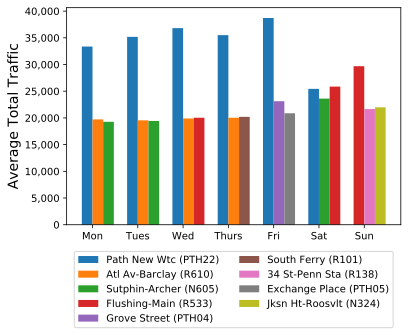

In [89]:
fig = plot_bar_group(final_dict)
fig.savefig('plot_mta_bar_top3_day_week.svg', bbox_inches='tight')

In [34]:
n = 10

In [35]:
top_df_monday = top_n_booths_per_day(df_monday,n)
top_df_monday = top_booths(top_df_monday,'Monday')

top_df_tuesday = top_n_booths_per_day(df_tuesday,n)
top_df_tuesday = top_booths(top_df_tuesday,'Tuesday')

top_df_wednesday = top_n_booths_per_day(df_wednesday,n)
top_df_wednesday = top_booths(top_df_wednesday,'Wednesday')

top_df_thursday = top_n_booths_per_day(df_thursday,n)
top_df_thursday = top_booths(top_df_thursday,'Thursday')

top_df_friday = top_n_booths_per_day(df_friday,n)
top_df_friday = top_booths(top_df_friday,'Friday')

top_df_saturday = top_n_booths_per_day(df_saturday,n)
top_df_saturday = top_booths(top_df_saturday,'Saturday')

top_df_sunday = top_n_booths_per_day(df_sunday,n)
top_df_sunday = top_booths(top_df_sunday,'Sunday')

In [36]:
top_df = pd.concat([top_df_monday, top_df_tuesday,top_df_wednesday,top_df_thursday,top_df_friday,top_df_saturday,top_df_sunday], axis=1)
top_df

,booth_Monday,total_ridership_Monday,booth_Tuesday,total_ridership_Tuesday,booth_Wednesday,total_ridership_Wednesday,booth_Thursday,total_ridership_Thursday,booth_Friday,total_ridership_Friday,booth_Saturday,total_ridership_Saturday,booth_Sunday,total_ridership_Sunday
0,PATH NEW WTC_PTH22,33366.974359,PATH NEW WTC_PTH22,35172.333333,PATH NEW WTC_PTH22,36818.743590,PATH NEW WTC_PTH22,35508.512821,PATH NEW WTC_PTH22,38707.025641,FLUSHING-MAIN_R533,25870.102564,FLUSHING-MAIN_R533,29685.435897
1,ATL AV-BARCLAY_R610,19723.871795,ATL AV-BARCLAY_R610,19548.461538,FLUSHING-MAIN_R533,20029.948718,SOUTH FERRY_R101,20199.692308,GROVE STREET_PTH04,23126.974359,PATH NEW WTC_PTH22,25438.974359,JKSN HT-ROOSVLT_N324,21986.589744
2,SUTPHIN-ARCHER_N605,19270.589744,SUTPHIN-ARCHER_N605,19442.871795,ATL AV-BARCLAY_R610,19903.794872,ATL AV-BARCLAY_R610,20033.717949,EXCHANGE PLACE_PTH05,20870.333333,SUTPHIN-ARCHER_N605,23623.743590,34 ST-PENN STA_R138,21657.487179
3,SOUTH FERRY_R101,19220.205128,GROVE STREET_PTH04,19302.179487,SUTPHIN-ARCHER_N605,19630.846154,SUTPHIN-ARCHER_N605,19437.769231,FLUSHING-MAIN_R533,20347.487179,34 ST-PENN STA_R138,21901.487179,125 ST_R258,20130.256410
4,GROVE STREET_PTH04,18556.589744,SOUTH FERRY_R101,19296.384615,SOUTH FERRY_R101,19463.179487,FLUSHING-MAIN_R533,19283.820513,ATL AV-BARCLAY_R610,20344.948718,GROVE STREET_PTH04,21533.487179,PATH NEW WTC_PTH22,19978.256410
5,FLUSHING-MAIN_R533,18526.923077,EXCHANGE PLACE_PTH05,18946.307692,GROVE STREET_PTH04,19160.717949,59 ST COLUMBUS_R158,19111.000000,SOUTH FERRY_R101,20266.871795,125 ST_R258,20919.435897,SUTPHIN-ARCHER_N605,19564.794872
6,EXCHANGE PLACE_PTH05,18139.000000,FLUSHING-MAIN_R533,18636.153846,59 ST COLUMBUS_R158,18713.871795,GROVE STREET_PTH04,18971.205128,SUTPHIN-ARCHER_N605,19858.512821,JOURNAL SQUARE_PTH03,20099.666667,42 ST-PORT AUTH_N062A,18777.487179
7,JOURNAL SQUARE_PTH03,17662.230769,59 ST COLUMBUS_R158,18534.230769,FULTON ST_N095A,18302.794872,EXCHANGE PLACE_PTH05,18563.538462,JAY ST-METROTEC_N103,19491.435897,JKSN HT-ROOSVLT_N324,19747.666667,JUNCTION BLVD_R528,18324.846154
8,FULTON ST_N095A,17283.102564,JAY ST-METROTEC_N103,17692.820513,JAY ST-METROTEC_N103,17978.743590,JAY ST-METROTEC_N103,18250.102564,59 ST COLUMBUS_R158,19222.974359,JUNCTION BLVD_R528,18541.000000,8 AV_H001,17386.282051
9,JFK JAMAICA CT1_JFK03,17173.871795,125 ST_R258,17168.051282,EXCHANGE PLACE_PTH05,17911.000000,JOURNAL SQUARE_PTH03,18034.820513,JOURNAL SQUARE_PTH03,18665.128205,JAY ST-METROTEC_N103,17615.307692,GROVE STREET_PTH04,17336.641026
